#### By: Peyman Shahidi
#### Created: Aug 14, 2025

<br>

<>:91: SyntaxWarning: invalid escape sequence '\p'
<>:91: SyntaxWarning: invalid escape sequence '\p'
/var/folders/87/z8v2_f0n6ss6sbvw7g9cs1gc0000gq/T/ipykernel_60325/1013063623.py:91: SyntaxWarning: invalid escape sequence '\p'
  plt.suptitle("Distribution $\phi(\overline{\\alpha})$ for Various Cases", fontsize=16)
/var/folders/87/z8v2_f0n6ss6sbvw7g9cs1gc0000gq/T/ipykernel_60325/1013063623.py:23: RuntimeWarning: overflow encountered in power
  bracket_term = bracket_inner**(-(1 + rho)/rho)
/var/folders/87/z8v2_f0n6ss6sbvw7g9cs1gc0000gq/T/ipykernel_60325/1013063623.py:25: RuntimeWarning: invalid value encountered in multiply
  return prefactor * alpha_term * bracket_term


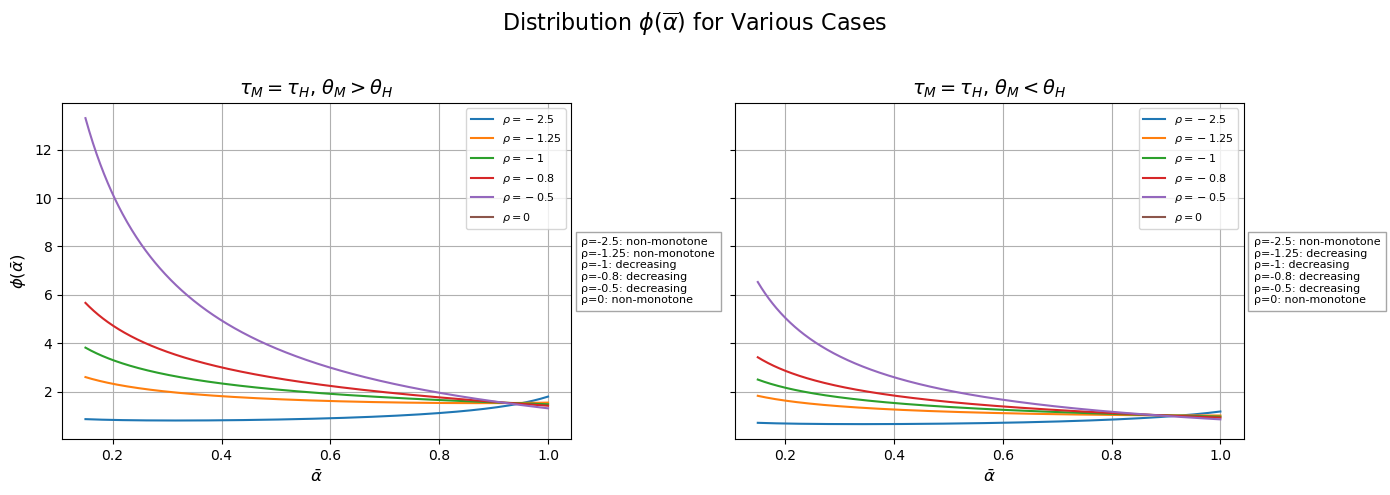

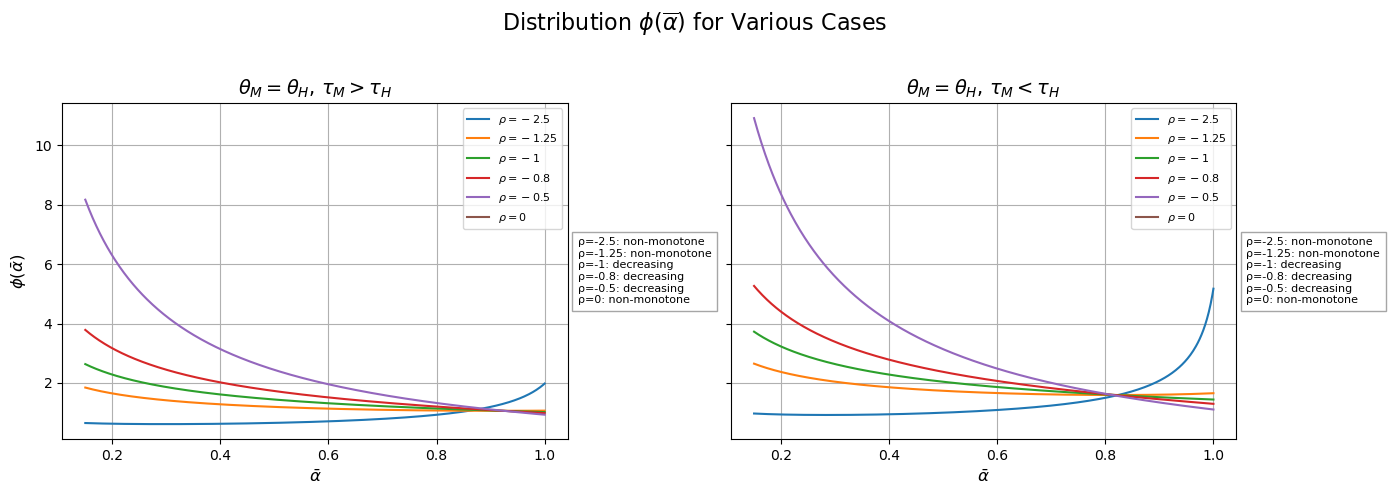

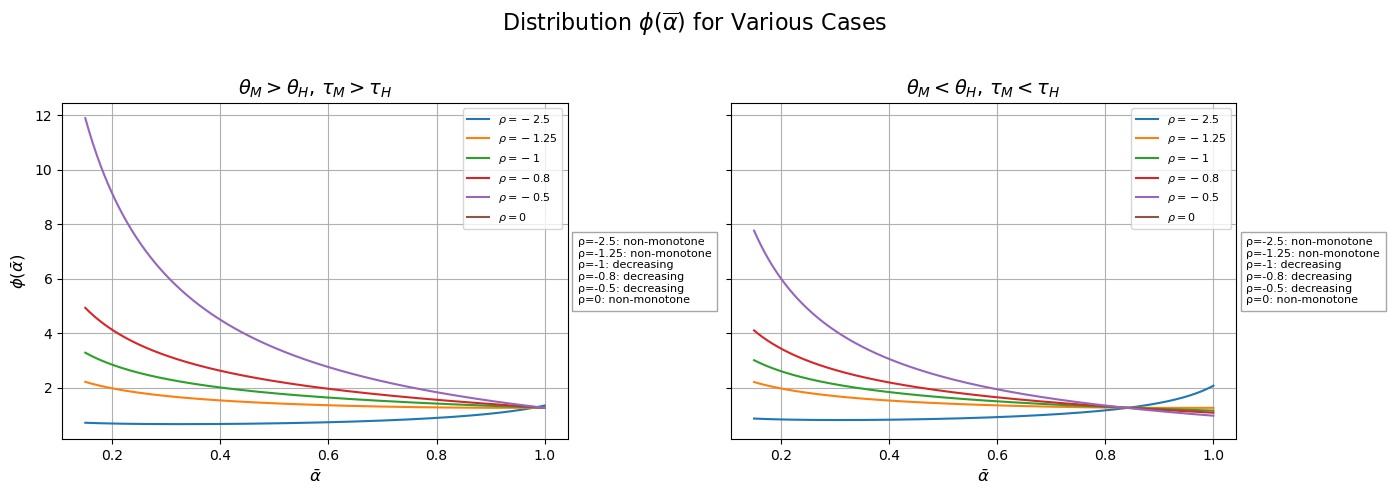

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def phi(alpha_bar, theta_M, theta_H, tau_M, tau_H, rho):
    # Handle special rho cases to avoid division-by-zero
    if rho == -1:
        rho = -1 + 1e-8
    if rho == 0:
        rho = 0 + 1e-8

    prefactor = ((1 - theta_M - theta_H)**(1/rho) *
                 (1 - theta_H * tau_H**rho)**(rho/(rho - 1)) *
                 (theta_M * tau_M**rho)**(1/(1 - rho)) /
                 (1 - rho))

    alpha_term = alpha_bar**(1/(rho - 1))

    bracket_inner = 1 - theta_H * tau_H**rho \
        - (1 - theta_H * tau_H**rho)**(rho/(rho - 1)) \
        * (theta_M * tau_M**rho)**(1/(1 - rho)) \
        * alpha_bar**(rho/(rho - 1))

    bracket_term = bracket_inner**(-(1 + rho)/rho)

    return prefactor * alpha_term * bracket_term


# Range of alpha
alpha_vals = np.linspace(0.15, 1.0, 500)

# rho values to plot
rho_values = [-2.5, -1.25, -1, -0.8, -0.5, 0]

# Group definitions: ( (theta_M, theta_H), (tau_M, tau_H), title )
groups = [
    # Case A: tau equal
    [(0.5, 0.3), (1.0, 1.0), r"$\tau_M = \tau_H$, $\theta_M > \theta_H$"],
    [(0.3, 0.5), (1.0, 1.0), r"$\tau_M = \tau_H$, $\theta_M < \theta_H$"],

    # Case B: theta equal
    [(0.4, 0.4), (1.2, 0.8), r"$\theta_M = \theta_H$, $\tau_M > \tau_H$"],
    [(0.4, 0.4), (0.8, 1.2), r"$\theta_M = \theta_H$, $\tau_M < \tau_H$"],

    # Case C: both for one type greater
    [(0.5, 0.3), (1.2, 0.8), r"$\theta_M > \theta_H$, $\tau_M > \tau_H$"],
    [(0.3, 0.5), (0.8, 1.2), r"$\theta_M < \theta_H$, $\tau_M < \tau_H$"]
]

def check_monotonicity(y_vals):
    tol = 1e-8
    dy = np.diff(y_vals)
    
    # Ignore tiny numerical fluctuations
    increasing = np.all(dy >= -tol)
    decreasing = np.all(dy <= tol)
    
    if increasing and not decreasing:
        return "increasing"
    elif decreasing and not increasing:
        return "decreasing"
    else:
        return "non-monotone"


# Create plots
for g in range(0, len(groups), 2):  # two subplots per figure
    fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
    for idx, ax in enumerate(axes):
        theta_M, theta_H = groups[g+idx][0]
        tau_M, tau_H = groups[g+idx][1]
        title = groups[g+idx][2]

        monotonic_notes = []
        for rho in rho_values:
            y_vals = phi(alpha_vals, theta_M, theta_H, tau_M, tau_H, rho)
            note = f"ρ={rho}: {check_monotonicity(y_vals)}"
            monotonic_notes.append(note)
            ax.plot(alpha_vals, y_vals, label=fr"$\rho = {rho}$")
        
        note_text = "\n".join(monotonic_notes)
        ax.set_title(title, fontsize=14)
        ax.set_xlabel(r"$\bar{\alpha}$", fontsize=12)
        if idx == 0:
            ax.set_ylabel(r"$\phi(\bar{\alpha})$", fontsize=12)
        ax.grid(True)
        ax.legend(fontsize=8)
        ax.text(1.02, 0.5, note_text, transform=ax.transAxes,
                fontsize=8, va='center', ha='left',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))

    plt.suptitle("Distribution $\phi(\overline{\\alpha})$ for Various Cases", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
